In [1]:
!pip install pandas openpyxl mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


In [3]:
# Load the dataset
data = pd.read_excel('Online retail.xlsx')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [5]:
# Display the first few rows of the dataset
data.head()

# Handle missing values by dropping rows with missing values
data.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
data['Items'] = data.iloc[:, 0].str.split(',')

basket = data['Items'].apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index()
basket.columns = ['Transaction', 'Item']

basket['Item'] = basket['Item'].str.strip()
basket_sets = basket.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
basket_sets = basket_sets.applymap(lambda x: 1 if x > 0 else 0)

basket_sets.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
Transaction,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Apply Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

frequent_itemsets.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.010800,(barbecue sauce)
3,0.014267,(black tea)
4,0.011467,(body spray)


In [8]:
# Extract the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules = rules[(rules['confidence'] >= 0.5) & (rules['lift'] >= 1)]

rules.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
346,"(eggs, ground beef)",(mineral water),0.020,0.238267,0.010133,0.506667,2.126469,0.005368,1.544054,0.540548
379,"(milk, ground beef)",(mineral water),0.022,0.238267,0.011067,0.503030,2.111207,0.005825,1.532756,0.538177


In [9]:
# Sort rules by lift and display the top 10
top_lift_rules = rules.sort_values(by='lift', ascending=False).head(10)
print(top_lift_rules)


             antecedents      consequents  antecedent support  \
346  (eggs, ground beef)  (mineral water)               0.020   
379  (milk, ground beef)  (mineral water)               0.022   

     consequent support   support  confidence      lift  leverage  conviction  \
346            0.238267  0.010133    0.506667  2.126469  0.005368    1.544054   
379            0.238267  0.011067    0.503030  2.111207  0.005825    1.532756   

     zhangs_metric  
346       0.540548  
379       0.538177  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Sort rules by lift and display the top 10
top_lift_rules = rules.sort_values(by='lift', ascending=False).head(10)
print(top_lift_rules)


             antecedents      consequents  antecedent support  \
346  (eggs, ground beef)  (mineral water)               0.020   
379  (milk, ground beef)  (mineral water)               0.022   

     consequent support   support  confidence      lift  leverage  conviction  \
346            0.238267  0.010133    0.506667  2.126469  0.005368    1.544054   
379            0.238267  0.011067    0.503030  2.111207  0.005825    1.532756   

     zhangs_metric  
346       0.540548  
379       0.538177  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


First few rows after splitting items:
  shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  \
0                             burgers,meatballs,eggs                                                                                                                                                                                
1                                            chutney                                                                                                                                                                                
2                                     turkey,avocado                                                                                                                                                                                
3  mineral water,milk,energy bar,whole wheat r

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent itemsets:
    support          itemsets
0  0.020267         (almonds)
1  0.033200         (avocado)
2  0.010800  (barbecue sauce)
3  0.014267       (black tea)
4  0.011467      (body spray)
Association rules:
             antecedents      consequents  antecedent support  \
346  (eggs, ground beef)  (mineral water)               0.020   
379  (milk, ground beef)  (mineral water)               0.022   

     consequent support   support  confidence      lift  leverage  conviction  \
346            0.238267  0.010133    0.506667  2.126469  0.005368    1.544054   
379            0.238267  0.011067    0.503030  2.111207  0.005825    1.532756   

     zhangs_metric  
346       0.540548  
379       0.538177  


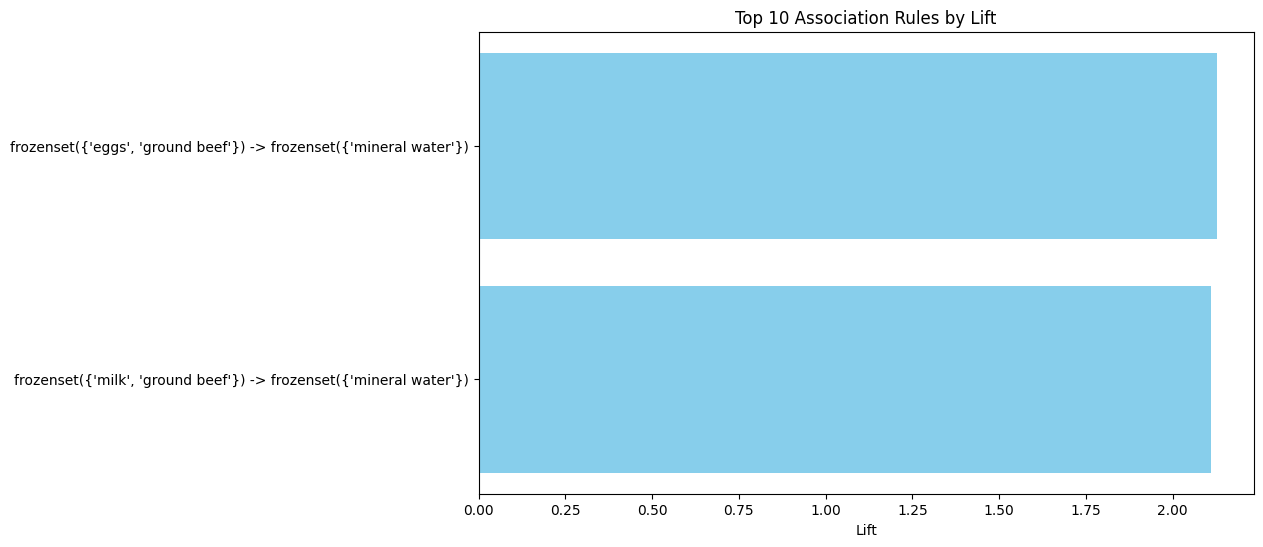

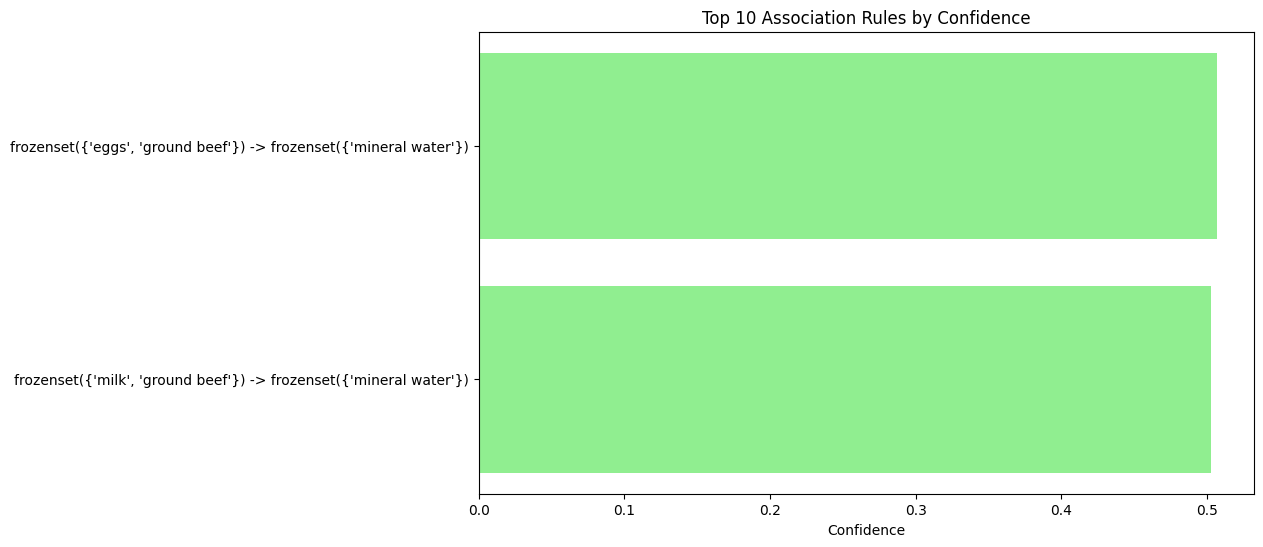

In [11]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt


# Assuming the dataset is a list of transactions in a single column
# Split the transactions into individual items
data['Items'] = data.iloc[:, 0].str.split(',')

# Display the first few rows after splitting items
print("First few rows after splitting items:")
print(data.head())

# Create a DataFrame with each transaction as a separate row and items as columns
basket = data['Items'].apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index()
basket.columns = ['Transaction', 'Item']

# Display the first few rows of the basket
print("First few rows of the basket:")
print(basket.head())

# One-hot encode the items
basket['Item'] = basket['Item'].str.strip()
basket_sets = basket.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
basket_sets = basket_sets.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the one-hot encoded data
print("First few rows of the one-hot encoded data:")
print(basket_sets.head())

# Apply Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
print("Frequent itemsets:")
print(frequent_itemsets.head())

# Extract the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Set thresholds for support, confidence, and lift
rules = rules[(rules['confidence'] >= 0.5) & (rules['lift'] >= 1)]

# Display the rules
print("Association rules:")
print(rules.head())

# Visualize the Top 10 Rules by Lift
top_lift_rules = rules.sort_values(by='lift', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_lift_rules)), top_lift_rules['lift'], color='skyblue')
plt.yticks(range(len(top_lift_rules)), [str(a) + ' -> ' + str(c) for a, c in zip(top_lift_rules['antecedents'], top_lift_rules['consequents'])])
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()

# Visualize the Top 10 Rules by Confidence
top_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_confidence_rules)), top_confidence_rules['confidence'], color='lightgreen')
plt.yticks(range(len(top_confidence_rules)), [str(a) + ' -> ' + str(c) for a, c in zip(top_confidence_rules['antecedents'], top_confidence_rules['consequents'])])
plt.xlabel('Confidence')
plt.title('Top 10 Association Rules by Confidence')
plt.gca().invert_yaxis()
plt.show()


In [12]:
# Display the column names
print("Column Names:", data.columns)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())


Column Names: Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil', 'Items'], dtype='object')
First few rows of the dataset:
  shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  \
0                             burgers,meatballs,eggs                                                                                                                                                                                
1                                            chutney                                                                                                                                                                                
2       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Create a DataFrame with each transaction as a separate row and items as columns
basket = data['Items'].apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index()
basket.columns = ['Transaction', 'Item']

# Display the first few rows of the basket
print("First few rows of the basket:")
print(basket.head())

# One-hot encode the items
basket['Item'] = basket['Item'].str.strip()
basket_sets = basket.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
basket_sets = basket_sets.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the one-hot encoded data
print("First few rows of the one-hot encoded data:")
print(basket_sets.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


First few rows of the basket:
   Transaction       Item
0            0    burgers
1            0  meatballs
2            0       eggs
3            1    chutney
4            2     turkey
First few rows of the one-hot encoded data:
Item         almonds  antioxydant juice  asparagus  avocado  babies food  \
Transaction                                                                
0                  0                  0          0        0            0   
1                  0                  0          0        0            0   
2                  0                  0          0        1            0   
3                  0                  0          0        0            0   
4                  0                  0          0        0            0   

Item         bacon  barbecue sauce  black tea  blueberries  body spray  ...  \
Transaction                                                             ...   
0                0               0          0            0           0  ...   


In [14]:
# Apply Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
print("Frequent itemsets:")
print(frequent_itemsets.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent itemsets:
    support          itemsets
0  0.020267         (almonds)
1  0.033200         (avocado)
2  0.010800  (barbecue sauce)
3  0.014267       (black tea)
4  0.011467      (body spray)


In [15]:
# Extract the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Set thresholds for support, confidence, and lift
rules = rules[(rules['confidence'] >= 0.5) & (rules['lift'] >= 1)]

# Display the rules
print("Association rules:")
print(rules.head())


Association rules:
             antecedents      consequents  antecedent support  \
346  (eggs, ground beef)  (mineral water)               0.020   
379  (milk, ground beef)  (mineral water)               0.022   

     consequent support   support  confidence      lift  leverage  conviction  \
346            0.238267  0.010133    0.506667  2.126469  0.005368    1.544054   
379            0.238267  0.011067    0.503030  2.111207  0.005825    1.532756   

     zhangs_metric  
346       0.540548  
379       0.538177  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


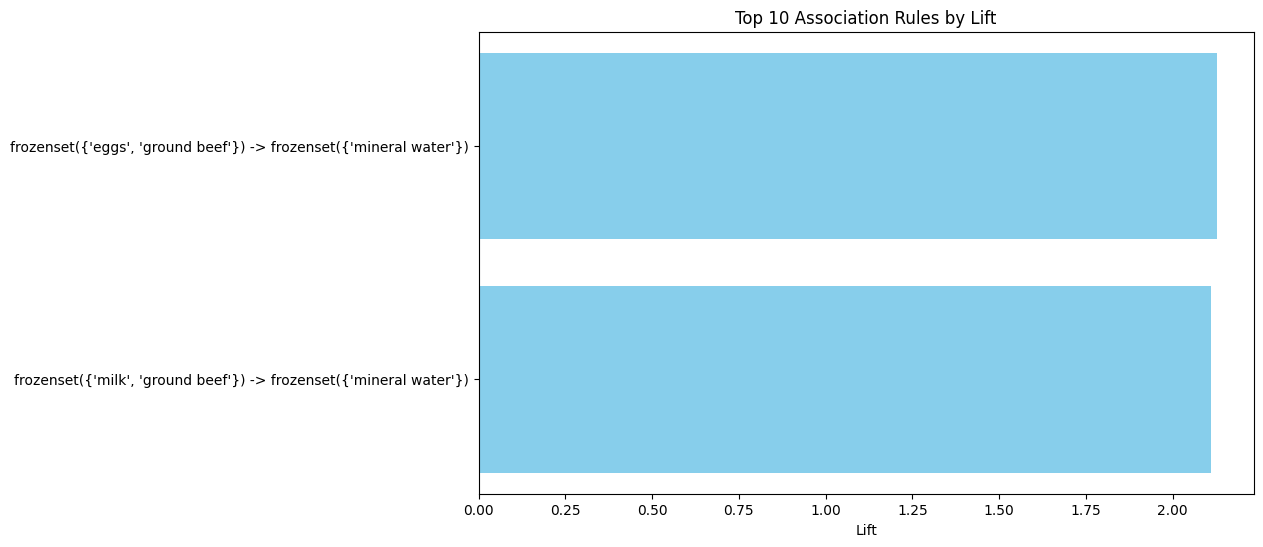

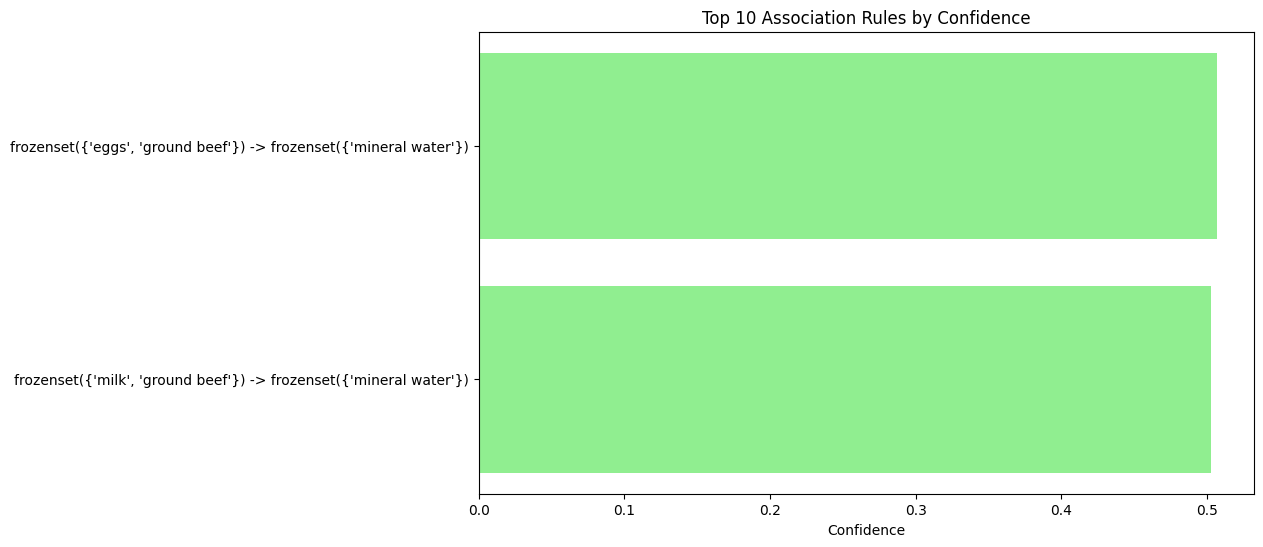

In [16]:
# Visualize the Top 10 Rules by Lift
top_lift_rules = rules.sort_values(by='lift', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_lift_rules)), top_lift_rules['lift'], color='skyblue')
plt.yticks(range(len(top_lift_rules)), [str(a) + ' -> ' + str(c) for a, c in zip(top_lift_rules['antecedents'], top_lift_rules['consequents'])])
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()

# Visualize the Top 10 Rules by Confidence
top_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_confidence_rules)), top_confidence_rules['confidence'], color='lightgreen')
plt.yticks(range(len(top_confidence_rules)), [str(a) + ' -> ' + str(c) for a, c in zip(top_confidence_rules['antecedents'], top_confidence_rules['consequents'])])
plt.xlabel('Confidence')
plt.title('Top 10 Association Rules by Confidence')
plt.gca().invert_yaxis()
plt.show()
